In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
%matplotlib inline

In [2]:
data = pd.read_csv('listings_clean.csv')

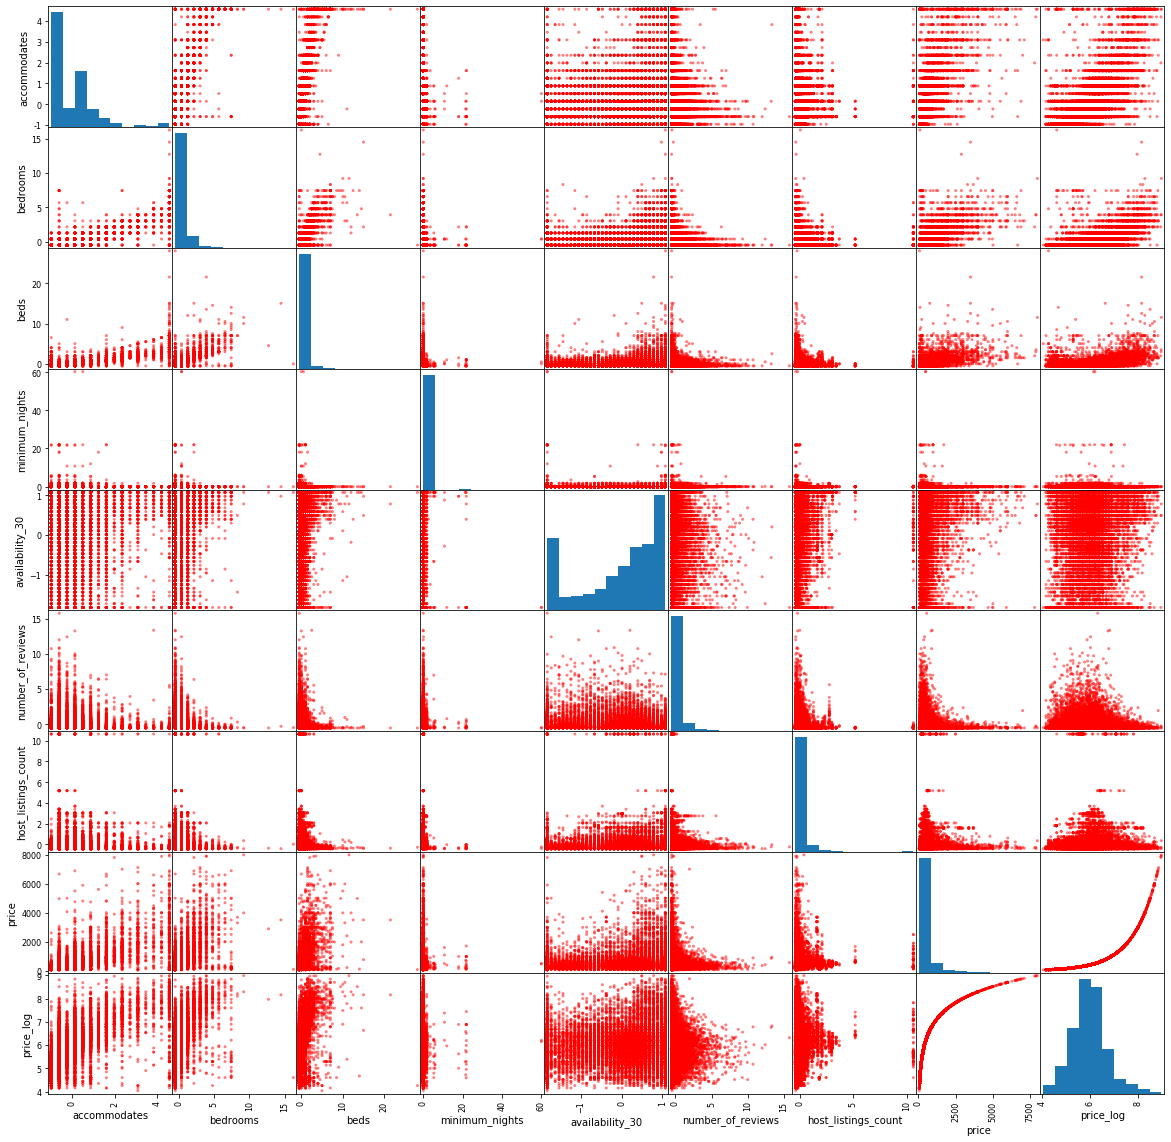

In [5]:
# check for collinearity and visualize relationship between each predictor and price
matrix_cols = ['accommodates', 'bedrooms', 'beds', 'minimum_nights', 'availability_30', 'number_of_reviews', 'host_listings_count', 'price', 'price_log']
axs = pd.plotting.scatter_matrix(data[matrix_cols], figsize=(20, 20), c='red')

In [36]:
df = pd.read_csv('listings.csv')
df.rename(columns={'neighbourhood_cleansed': 'borough'}, inplace=True)
# Importing the Beijing borough boundary GeoJSON file as a dataframe in geopandas
import geopandas as gpd
map_df = gpd.read_file('neighbourhoods.geojson')
map_df.head()

,neighbourhood,neighbourhood_group,geometry
0,东城区,None,"MULTIPOLYGON (((116.44231 39.90180, 116.44246 ..."
1,西城区,None,"MULTIPOLYGON (((116.39155 39.89710, 116.39157 ..."
2,昌平区,None,"MULTIPOLYGON (((116.04274 40.08406, 116.03750 ..."
3,大兴区 / Daxing,None,"MULTIPOLYGON (((116.73473 39.62160, 116.69884 ..."
4,房山区,None,"MULTIPOLYGON (((116.24662 39.79181, 116.24320 ..."


In [37]:
df['borough'].head()

0    朝阳区 / Chaoyang
1       密云县 / Miyun
2    朝阳区 / Chaoyang
3    朝阳区 / Chaoyang
4    朝阳区 / Chaoyang
Name: borough, dtype: object

In [38]:
borough_df = pd.DataFrame(df.groupby('borough').size())
borough_df.head()

,0
borough,
东城区,3167
丰台区 / Fengtai,2193
大兴区 / Daxing,1086
密云县 / Miyun,1772
平谷区 / Pinggu,210


In [39]:
borough_df.rename(columns={0: 'number_of_listings'}, inplace=True)
borough_df.head()

,number_of_listings
borough,
东城区,3167
丰台区 / Fengtai,2193
大兴区 / Daxing,1086
密云县 / Miyun,1772
平谷区 / Pinggu,210


In [40]:
#transfer price from str into float
df['price'] = (df['price'].str.replace(r'[^-+\d.]', '').astype(float))
borough_df['median_price'] = df.groupby('borough').price.median().values
borough_df.head()

,number_of_listings,median_price
borough,,
东城区,3167,518.0
丰台区 / Fengtai,2193,391.0
大兴区 / Daxing,1086,337.5
密云县 / Miyun,1772,539.0
平谷区 / Pinggu,210,640.0


In [41]:


# Joining the dataframes
borough_map_df = map_df.set_index('neighbourhood').join(borough_df)

In [42]:
borough_map_df.head()

,neighbourhood_group,geometry,number_of_listings,median_price
neighbourhood,,,,
东城区,None,"MULTIPOLYGON (((116.44231 39.90180, 116.44246 ...",3167,518.0
西城区,None,"MULTIPOLYGON (((116.39155 39.89710, 116.39157 ...",1829,491.0
昌平区,None,"MULTIPOLYGON (((116.04274 40.08406, 116.03750 ...",1496,327.0
大兴区 / Daxing,None,"MULTIPOLYGON (((116.73473 39.62160, 116.69884 ...",1086,337.5
房山区,None,"MULTIPOLYGON (((116.24662 39.79181, 116.24320 ...",810,292.0


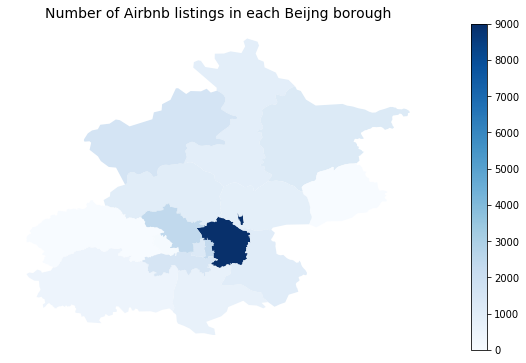

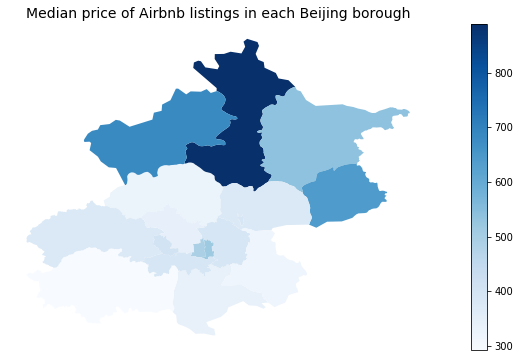

In [45]:
# Plotting the number of listings in each borough
fig1, ax1 = plt.subplots(1, figsize=(15, 6))
borough_map_df.plot(column='number_of_listings', cmap='Blues', ax=ax1)
ax1.axis('off')
ax1.set_title('Number of Airbnb listings in each Beijng borough', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=9000))
sm._A = [] # Creates an empty array for the data range
cbar = fig1.colorbar(sm)
plt.show()

# Plotting the median price of listings in each borough
fig2, ax2 = plt.subplots(1, figsize=(15, 6))
borough_map_df.plot(column='median_price', cmap='Blues', ax=ax2)
ax2.axis('off')
ax2.set_title('Median price of Airbnb listings in each Beijing borough', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(borough_map_df.median_price), vmax=max(borough_map_df.median_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)
plt.show()